In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
# Read Renewables.ninja data download
csvs = [f for f in os.listdir('../data/') if f.endswith('.csv')]
csvs[0]

'ninja-wind-country-DK-current_offshore-merra2.csv'

In [3]:
data = pd.read_csv(os.path.join('../data/', csvs[0]), skiprows=3)
data

,time,NATIONAL,DK01,DK02,DK03,DK04,DK05
0,1980-01-01 00:00:00+00:00,0.170194,0.179923,0.274592,0.028893,0.179428,NaN
1,1980-01-01 01:00:00+00:00,0.169588,0.175861,0.270554,0.035971,0.173891,NaN
2,1980-01-01 02:00:00+00:00,0.171789,0.167440,0.263590,0.056549,0.166568,NaN
3,1980-01-01 03:00:00+00:00,0.176225,0.156323,0.259220,0.084174,0.153394,NaN
4,1980-01-01 04:00:00+00:00,0.178511,0.144119,0.257087,0.106181,0.134349,NaN
...,...,...,...,...,...,...,...
394483,2024-12-31 19:00:00+00:00,0.922248,0.785227,0.888832,0.977820,0.916716,NaN
394484,2024-12-31 20:00:00+00:00,0.934544,0.813501,0.911992,0.979239,0.922118,NaN
394485,2024-12-31 21:00:00+00:00,0.942698,0.845829,0.928425,0.980816,0.920944,NaN
394486,2024-12-31 22:00:00+00:00,0.948717,0.864605,0.939944,0.981099,0.923350,NaN


In [4]:
# Isolate last year of data
data['time'] = pd.to_datetime(data['time'])
latest_year = data['time'].dt.year.max()
year_data = data[data['time'].dt.year == latest_year]
year_data

,time,NATIONAL,DK01,DK02,DK03,DK04,DK05
385704,2024-01-01 00:00:00+00:00,0.454835,0.173019,0.267880,0.653227,0.555830,NaN
385705,2024-01-01 01:00:00+00:00,0.420110,0.148641,0.251600,0.596471,0.517020,NaN
385706,2024-01-01 02:00:00+00:00,0.386809,0.139856,0.241781,0.515672,0.509076,NaN
385707,2024-01-01 03:00:00+00:00,0.391417,0.158294,0.266999,0.486403,0.524008,NaN
385708,2024-01-01 04:00:00+00:00,0.402592,0.190404,0.283737,0.485348,0.541169,NaN
...,...,...,...,...,...,...,...
394483,2024-12-31 19:00:00+00:00,0.922248,0.785227,0.888832,0.977820,0.916716,NaN
394484,2024-12-31 20:00:00+00:00,0.934544,0.813501,0.911992,0.979239,0.922118,NaN
394485,2024-12-31 21:00:00+00:00,0.942698,0.845829,0.928425,0.980816,0.920944,NaN
394486,2024-12-31 22:00:00+00:00,0.948717,0.864605,0.939944,0.981099,0.923350,NaN


In [5]:
def get_month_positions(time_series, year):
    """Calculate month positions and labels for x-axis
    
    Parameters
    ----------
    time_series : pd.Series or array
        Time series data with datetime values
    year : int
        Year to calculate months for
        
    Returns
    -------
    positions : list
        Month midpoint positions for tick placement
    labels : list
        Three-letter month abbreviations
    """
    tz = time_series.dt.tz if hasattr(time_series, 'dt') else None
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_positions = []
    month_labels = []
    
    time_max = time_series.max() if hasattr(time_series, 'max') else np.max(time_series)
    
    for i, month in enumerate(range(1, 13)):
        month_start = pd.Timestamp(year=year, month=month, day=1, tz=tz)
        if month < 12:
            month_end = pd.Timestamp(year=year, month=month+1, day=1, tz=tz)
        else:
            month_end = time_max
        
        if month_start <= time_max:
            month_mid = month_start + (month_end - month_start) / 2
            month_positions.append(month_mid)
            month_labels.append(month_names[i])
    
    return month_positions, month_labels


def format_timeseries_axis(ax, time_series, year, title='', fontsize=14):
    """Apply consistent formatting to a timeseries plot axis
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis to format
    time_series : pd.Series or array
        Time series data for calculating month positions
    year : int
        Year for month markers
    title : str, optional
        Title for the subplot
    fontsize : int
        Font size for labels
    """
    tz = time_series.dt.tz if hasattr(time_series, 'dt') else None
    time_max = time_series.max() if hasattr(time_series, 'max') else np.max(time_series)
    
    # Add vertical lines at the start of each month
    for month in range(1, 13):
        month_start = pd.Timestamp(year=year, month=month, day=1, tz=tz)
        if month_start <= time_max:
            ax.axvline(month_start, color='grey', linewidth=0.5, alpha=0.3)
    
    # Set month labels
    month_positions, month_labels = get_month_positions(time_series, year)
    ax.set_xticks(month_positions)
    ax.set_xticklabels(month_labels, fontsize=fontsize)
    
    # Clean formatting
    ax.set_xlabel('')
    ax.set_yticks([])
    if title:
        ax.set_title(title, fontsize=fontsize)


def calculate_segment_value(indices, y_original, method=np.mean):
    """Calculate value for each segment between discrete points
    
    Parameters
    ----------
    indices : array-like
        Indices of discrete points
    y_original : array-like
        Original y values
    method : callable
        Function to apply to each segment (e.g., np.mean, np.max, np.min, np.median)
    """
    y_val = []
    for i in range(len(indices)):
        if i < len(indices) - 1:
            segment_val = method(y_original[indices[i]:indices[i+1]])
        else:
            # Last point - use its value
            segment_val = y_original[indices[i]]
        y_val.append(segment_val)
    return np.array(y_val)


def plot_discretization_comparison(x, y, x_discrete, y_discrete, 
                                   year, color='black', 
                                   title='', method_label=''):
    """Plot original vs discretized timeseries with consistent formatting
    
    Parameters
    ----------
    x : array-like
        Original time values
    y : array-like
        Original y values
    x_discrete : array-like
        Discretized time values
    y_discrete : array-like
        Discretized y values
    year : int
        Year for month markers
    color : str
        Color for discretized line
    title : str, optional
        Plot title
    method_label : str, optional
        Label for the discretization method
        
    Returns
    -------
    fig, ax : matplotlib figure and axes
    """
    fig, ax = plt.subplots(figsize=(16, 4))
    
    # Plot data
    ax.plot(x, y, 'lightgray', alpha=0.5)
    ax.step(x_discrete, y_discrete, where='post', color=color, linewidth=1.5, label=method_label)
    ax.scatter(x_discrete, y_discrete, color=color, s=10, zorder=5)
    
    # Format axis
    format_timeseries_axis(ax, pd.Series(x), year, title=title)
    
    if method_label:
        ax.legend()
    
    plt.tight_layout()
    return fig, ax


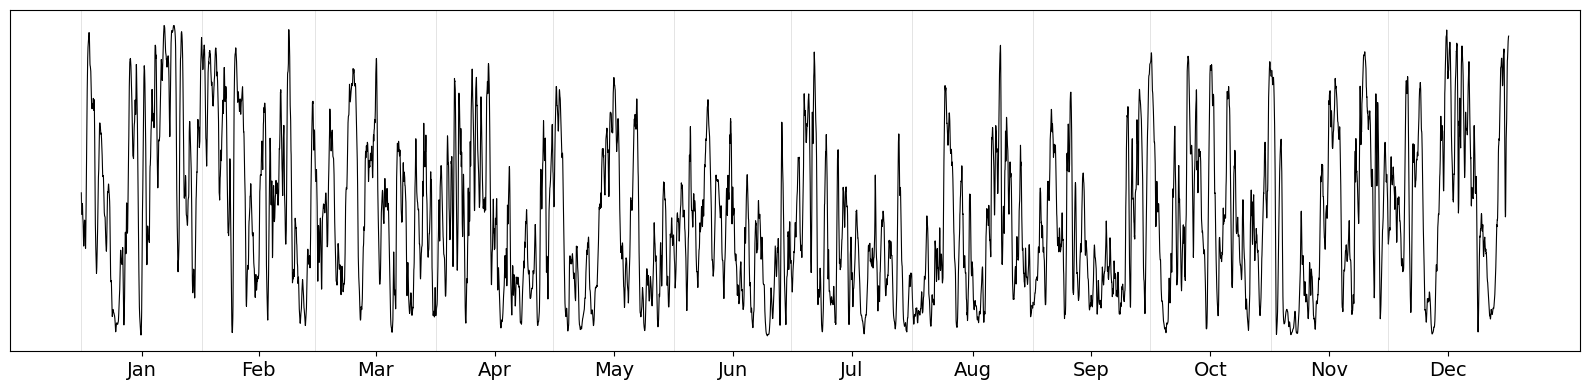

In [6]:
# Plot a timeseries of the NATIONAL column
fig, ax = plt.subplots(figsize=(16, 4))

# Plot the data in black
ax.plot(year_data['time'], year_data['NATIONAL'], color='black', linewidth=0.8)

# Apply consistent formatting using the modular function
format_timeseries_axis(ax, year_data['time'], latest_year)

# Clean up the plot
plt.tight_layout()
plt.show()


In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.pardir)))

Original: 8784 points
RDP: 604 points (6.9%)
Critical Points: 389 points (4.4%)


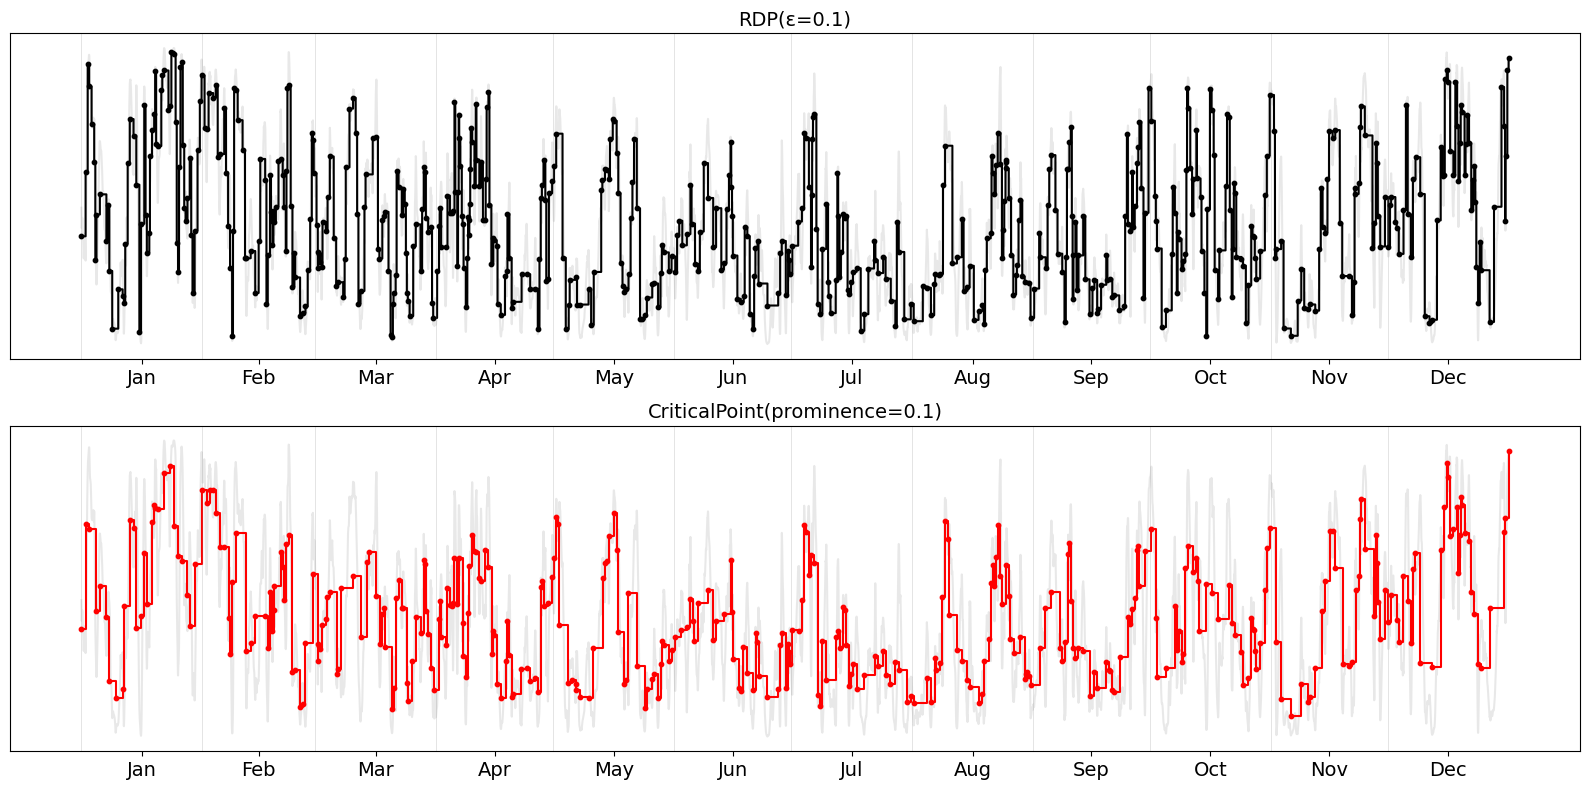

In [8]:
from pyoscomp.input.discretize import RamerDouglasPeucker, CriticalPoint

# Prepare your data
x = year_data['time'].values
y = year_data['NATIONAL'].values

# RDP Discretization
rdp = RamerDouglasPeucker(epsilon=0.1)
indices_rdp = rdp.discretize(y, x)
x_discrete_rdp, y_discrete_rdp = rdp.fit_discretize(y, x)
y_avg_rdp = calculate_segment_value(indices_rdp, y, method=np.mean)

# Critical Point Discretization
cp = CriticalPoint(min_prominence=0.1, include_inflection=False)
indices_cp = cp.discretize(y, x)
x_discrete_cp, y_discrete_cp = cp.fit_discretize(y, x)
y_avg_cp = calculate_segment_value(indices_cp, y, method=np.mean)

# Print results
print(f"Original: {len(y)} points")
print(f"RDP: {len(indices_rdp)} points ({100*len(indices_rdp)/len(y):.1f}%)")
print(f"Critical Points: {len(indices_cp)} points ({100*len(indices_cp)/len(y):.1f}%)")

# Create comparison plot using modular functions
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot 1: RDP
axes[0].plot(x, y, 'lightgray', alpha=0.5)
axes[0].step(x_discrete_rdp, y_avg_rdp, where='post', color='black', linewidth=1.5)
axes[0].scatter(x_discrete_rdp, y_avg_rdp, color='black', s=10, zorder=5)
format_timeseries_axis(axes[0], year_data['time'], latest_year, title=f'{rdp}')

# Plot 2: Critical Points
axes[1].plot(x, y, 'lightgray', alpha=0.5)
axes[1].step(x_discrete_cp, y_avg_cp, where='post', color='red', linewidth=1.5)
axes[1].scatter(x_discrete_cp, y_avg_cp, color='red', s=10, zorder=5)
format_timeseries_axis(axes[1], year_data['time'], latest_year, title=f'{cp}')

plt.tight_layout()
plt.show()


Original: 8784 points
PELT: 72 points (0.8%)
Window k-means: 344 points (3.9%)


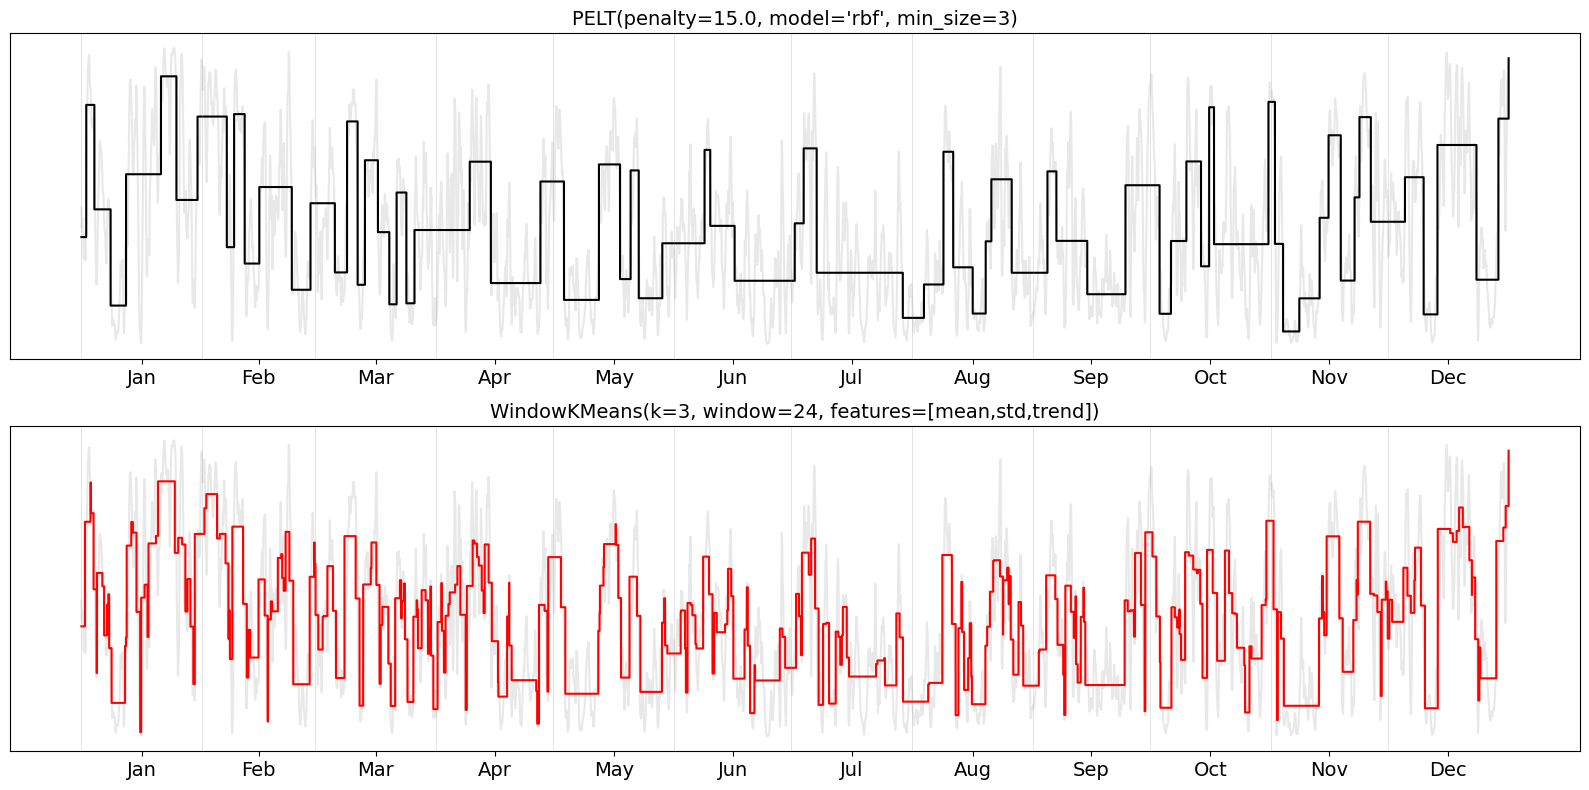

In [26]:
from pyoscomp.input.discretize import PELT, WindowKMeans

# Prepare your data
x = year_data['time'].values
y = year_data['NATIONAL'].values

# PELT Discretization
pelt = PELT(penalty=15.0, model='rbf', min_size=3)
indices_pelt = pelt.discretize(y, x)
x_discrete_pelt, y_discrete_pelt = pelt.fit_discretize(y, x)

# Window k-means Discretization
wkm = WindowKMeans(n_clusters=3, window_size=24, features=['mean', 'std', 'trend'])
indices_wkm = wkm.discretize(y, x)
x_discrete_wkm, y_discrete_wkm = wkm.fit_discretize(y, x)

# Print results
print(f"Original: {len(y)} points")
print(f"PELT: {len(indices_pelt)} points ({100*len(indices_pelt)/len(y):.1f}%)")
print(f"Window k-means: {len(indices_wkm)} points ({100*len(indices_wkm)/len(y):.1f}%)")

# Create comparison plot using modular functions
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Plot 1: PELT
axes[0].plot(x, y, 'lightgray', alpha=0.5)
x_filled, y_filled = pelt.fill_discretized(y, indices_pelt, x, method=np.mean)
axes[0].step(x_filled, y_filled, where='post', color='black', linewidth=1.5)
format_timeseries_axis(axes[0], year_data['time'], latest_year, title=f'{pelt}')

# Plot 2: Window k-means
axes[1].plot(x, y, 'lightgray', alpha=0.5)
x_filled, y_filled = wkm.fill_discretized(y, indices_wkm, x, method=np.mean)
axes[1].step(x_filled, y_filled, where='post', color='red', linewidth=1.5)
format_timeseries_axis(axes[1], year_data['time'], latest_year, title=f'{wkm}')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def extract_temporal_features(times):
    """
    Extract temporal features from datetime array.
    
    Parameters
    ----------
    times : array of datetime64
        Timestamps
        
    Returns
    -------
    dict : Dictionary of temporal feature arrays
    """
    times_dt = pd.to_datetime(times)
    
    return {
        'hour': times_dt.hour.values,
        'day_of_week': times_dt.dayofweek.values,
        'day_of_month': times_dt.day.values,
        'week_of_year': times_dt.isocalendar().week.values,
        'month': times_dt.month.values,
        'day_of_year': times_dt.dayofyear.values,
    }

def extract_statistical_features(values, window_size=24):
    """
    Extract rolling statistical features from values.
    
    Parameters
    ----------
    values : array
        Time series values
    window_size : int
        Window size for rolling statistics
        
    Returns
    -------
    dict : Dictionary of statistical feature arrays
    """
    values_series = pd.Series(values)
    
    # Rolling statistics
    rolling_mean = values_series.rolling(window=window_size, center=True, min_periods=1).mean().values
    rolling_std = values_series.rolling(window=window_size, center=True, min_periods=1).std().fillna(0).values
    rolling_min = values_series.rolling(window=window_size, center=True, min_periods=1).min().values
    rolling_max = values_series.rolling(window=window_size, center=True, min_periods=1).max().values
    
    # Trend (simple difference)
    trend = np.gradient(values)
    
    return {
        'value': values,
        'rolling_mean': rolling_mean,
        'rolling_std': rolling_std,
        'rolling_min': rolling_min,
        'rolling_max': rolling_max,
        'trend': trend,
    }

def build_feature_matrix(times, values, 
                         temporal_features=['hour', 'day_of_week', 'month'],
                         statistical_features=['value', 'rolling_mean', 'trend'],
                         window_size=24):
    """
    Build combined feature matrix for clustering.
    
    Parameters
    ----------
    times : array
        Timestamps
    values : array
        Time series values
    temporal_features : list or None
        Which temporal features to include. Can be None to skip temporal features.
    statistical_features : list or None
        Which statistical features to include. Can be None to skip statistical features.
    window_size : int
        Window size for rolling statistics
        
    Returns
    -------
    np.ndarray : Feature matrix (n_samples, n_features)
    list : Feature names
    """
    # Validate that at least one feature type is provided
    if temporal_features is None and statistical_features is None:
        raise ValueError("At least one of temporal_features or statistical_features must be provided (not None)")
    
    feature_arrays = []
    feature_names = []
    
    # Add temporal features
    if temporal_features is not None:
        temp_feats = extract_temporal_features(times)
        for feat in temporal_features:
            if feat in temp_feats:
                feature_arrays.append(temp_feats[feat])
                feature_names.append(feat)
    
    # Add statistical features
    if statistical_features is not None:
        stat_feats = extract_statistical_features(values, window_size)
        for feat in statistical_features:
            if feat in stat_feats:
                feature_arrays.append(stat_feats[feat])
                feature_names.append(feat)
    
    # Stack and return
    feature_matrix = np.column_stack(feature_arrays)
    return feature_matrix, feature_names

def cluster_timeseries(times, values, n_clusters=3,
                      temporal_features=['hour', 'day_of_week', 'month'],
                      statistical_features=['value', 'rolling_mean', 'trend'],
                      window_size=24,
                      normalize=True):
    """
    Cluster time series points based on temporal and statistical features.
    
    Parameters
    ----------
    times : array
    temporal_features : list or None
        Temporal features to use. Can be None to skip temporal features.
    statistical_features : list or None
        Statistical features to use. Can be None to skip statistical features.
        Number of clusters
    temporal_features : list
        Temporal features to use
    statistical_features : list
        Statistical features to use
    window_size : int
        Window size for rolling statistics
    normalize : bool
        Whether to normalize features before clustering
        
    Returns
    -------
    cluster_labels : np.ndarray
        Cluster assignment for each point
    # Build feature matrix (will raise error if both are None)
        The feature matrix used for clustering
    feature_names : list
        Names of features used
    """
    # Build feature matrix
    feature_matrix, feature_names = build_feature_matrix(
        times, values, temporal_features, statistical_features, window_size
    )
    
    # Normalize features
    if normalize:
        scaler = StandardScaler()
        feature_matrix_scaled = scaler.fit_transform(feature_matrix)
    else:
        feature_matrix_scaled = feature_matrix
    
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(feature_matrix_scaled)
    
    print(f"Clustering complete: {n_clusters} clusters")
    print(f"Features used ({len(feature_names)}): {', '.join(feature_names)}")
    
    return cluster_labels, feature_matrix, feature_names

def calculate_cluster_value(cluster_labels, y_original, method=np.mean):
    """
    Calculate representative value, minimum, and maximum for each cluster.
    
    Parameters
    ----------
    cluster_labels : array-like
        Cluster assignment for each point
    y_original : array-like
        Original y values
    method : callable
        Function to apply to each cluster (e.g., np.mean, np.max, np.min, np.median)
        
    Returns
    -------
    cluster_values : np.ndarray
        Representative value for each cluster
    cluster_mins : np.ndarray
        Minimum value for each cluster
    cluster_maxs : np.ndarray
        Maximum value for each cluster
    cluster_ids : np.ndarray
        Sorted unique cluster IDs
    """
    unique_clusters = np.unique(cluster_labels)
    cluster_values = np.zeros(len(unique_clusters))
    cluster_mins = np.zeros(len(unique_clusters))
    cluster_maxs = np.zeros(len(unique_clusters))
    
    for i, cluster_id in enumerate(unique_clusters):
        cluster_mask = cluster_labels == cluster_id
        cluster_data = y_original[cluster_mask]
        cluster_values[i] = method(cluster_data)
        cluster_mins[i] = np.min(cluster_data)    
        cluster_maxs[i] = np.max(cluster_data)

    return cluster_values, cluster_mins, cluster_maxs, unique_clusters

Testing K-Means Clustering on Time Series
Clustering complete: 16 clusters
Features used (1): value


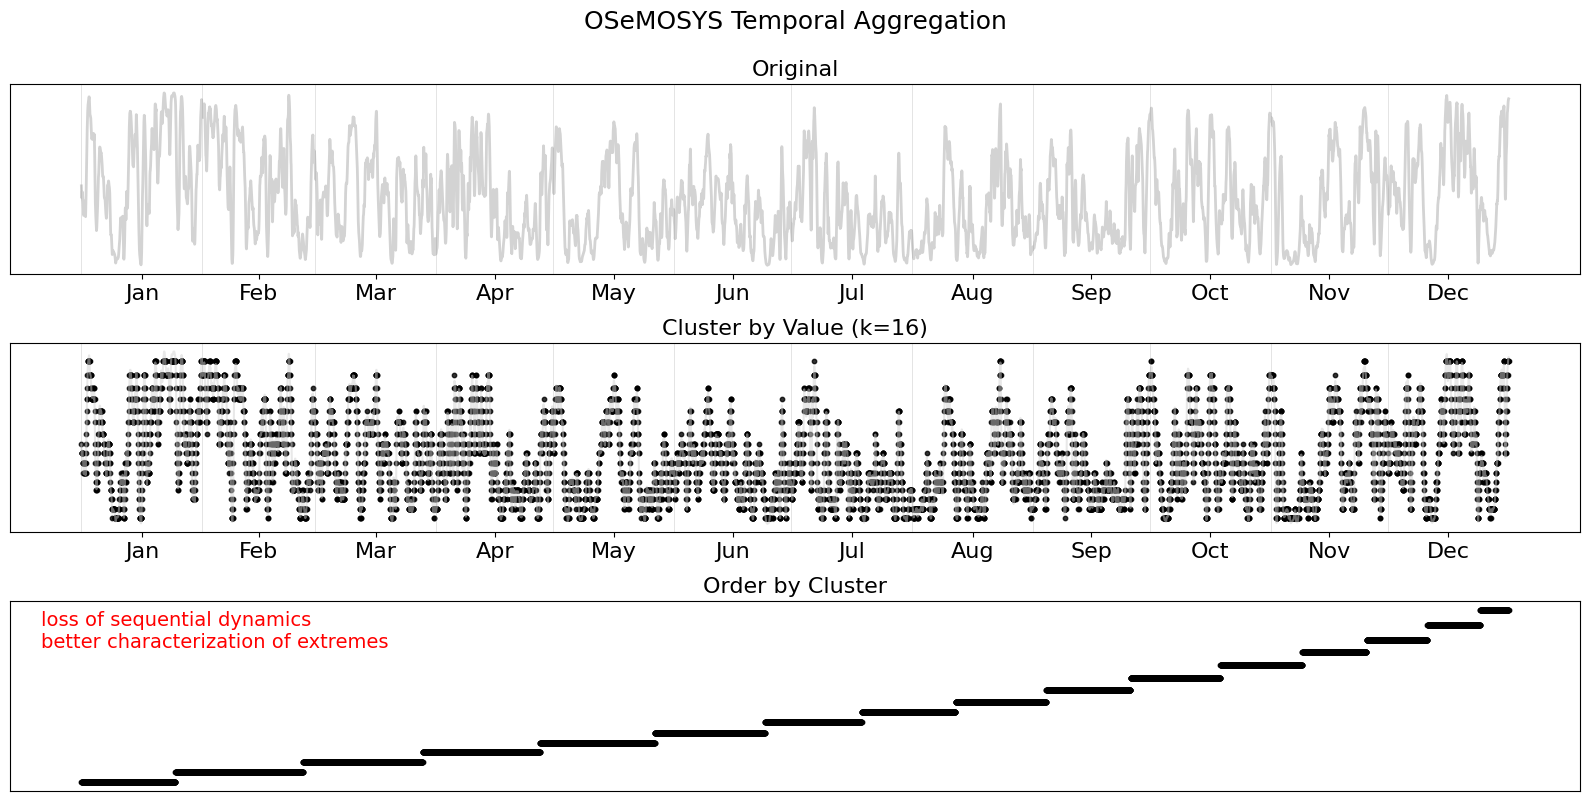


Original: 8784 points
Clustered: 16 representative values
Compression: 0.2%


In [43]:
# Test with 3 clusters
print("Testing K-Means Clustering on Time Series")
print("=" * 60)

# Prepare data
x = year_data['time'].values
y = year_data['NATIONAL'].values

cluster_labels, features, feature_names = cluster_timeseries(
    x, y, 
    n_clusters=16,
    temporal_features=None,
    statistical_features=['value'],
    window_size=12
)

# Calculate representative values for each cluster
cluster_values, cluster_mins, cluster_maxs, cluster_ids = calculate_cluster_value(cluster_labels, y, method=np.mean)

# Visualize the clustered time series
fig, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot 1: Original timeseries
colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_ids)))
cluster_to_color = {cluster_id: colors[i] for i, cluster_id in enumerate(cluster_ids)}

axes[0].plot(x, y, 'lightgray', linewidth=2.0, label='Original')

for cluster_id in cluster_ids:
    cluster_mask = cluster_labels == cluster_id

format_timeseries_axis(axes[0], year_data['time'], latest_year, 
                       title=f'Original', fontsize=16)

# Plot 2: Representative values scatter
y_representative = np.array([cluster_values[cluster_id] for cluster_id in cluster_labels])

axes[1].plot(x, y, 'lightgray', alpha=0.5, label='Original')
axes[1].scatter(x, y_representative, color='black', s=10, alpha=0.8, label='Cluster Representatives')

format_timeseries_axis(axes[1], year_data['time'], latest_year,
                      title=f'Cluster by Value (k={len(cluster_ids)})',
                      fontsize=16)

# Plot 3: Hours ordered by cluster value
# Sort indices by cluster value
sorted_indices = np.argsort([cluster_values[cluster_id] for cluster_id in cluster_labels])
y_representative_sorted = y_representative[sorted_indices]

axes[2].scatter(range(len(y_representative_sorted)), y_representative_sorted, color='black', s=10, zorder=5)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title('Order by Cluster', fontsize=16)
axes[2].text(0.02, 0.95, 'loss of sequential dynamics\nbetter characterization of extremes', transform=axes[2].transAxes, 
            fontsize=14, color='red', verticalalignment='top')

fig.suptitle('OSeMOSYS Temporal Aggregation', fontsize=18, y=0.995)
plt.tight_layout()
plt.show()

print(f"\nOriginal: {len(y)} points")
print(f"Clustered: {len(cluster_ids)} representative values")
print(f"Compression: {100 * len(cluster_ids) / len(y):.1f}%")

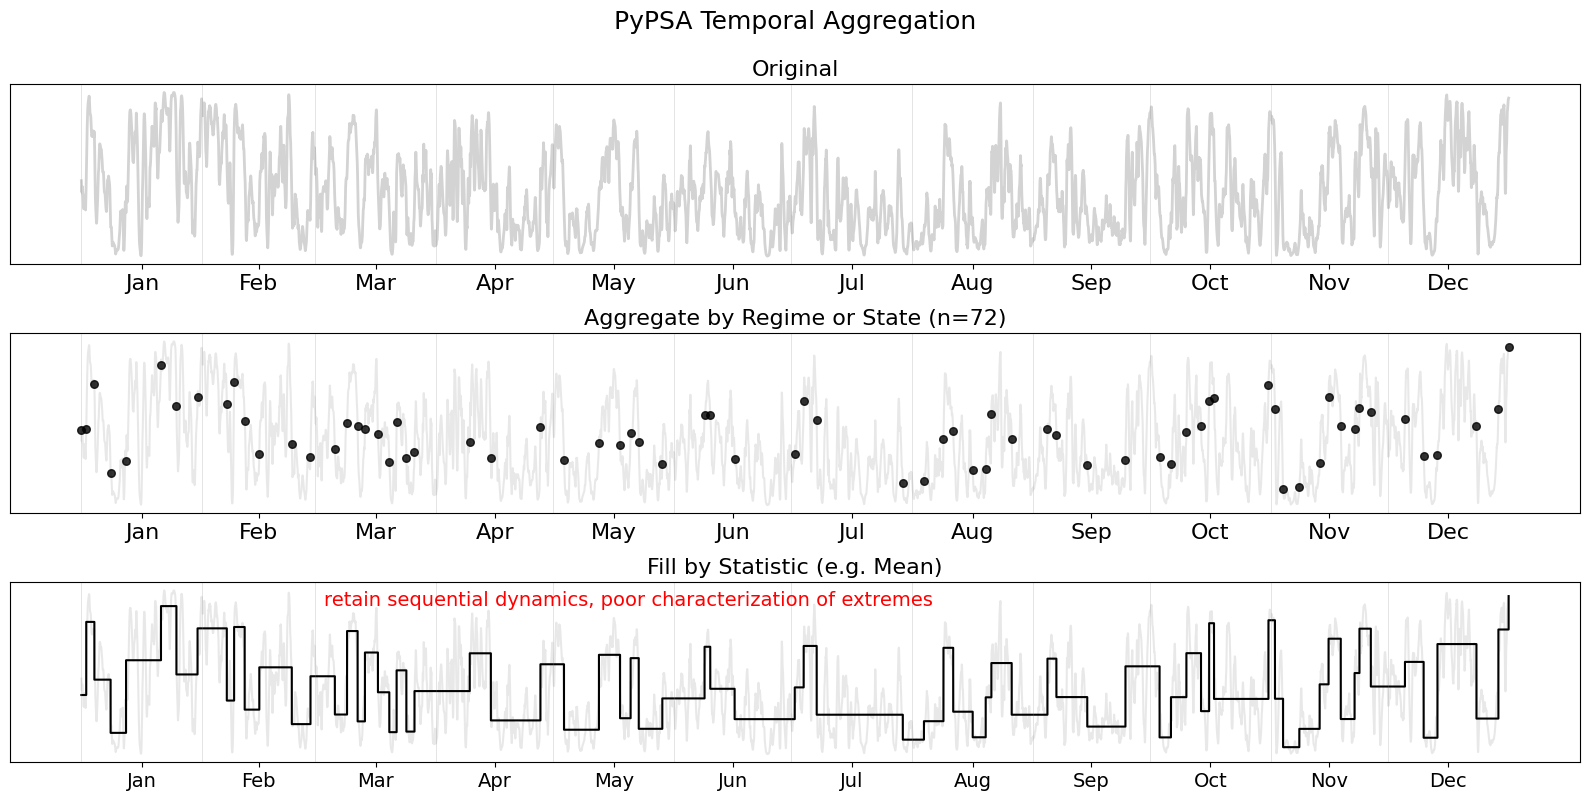

In [44]:
from pyoscomp.input.discretize import PELT, WindowKMeans

# Prepare your data
x = year_data['time'].values
y = year_data['NATIONAL'].values

# PELT Discretization
pelt = PELT(penalty=15.0, model='rbf', min_size=3)
indices_pelt = pelt.discretize(y, x)
x_discrete_pelt, y_discrete_pelt = pelt.fit_discretize(y, x)

# Visualize the clustered time series
fig, axes = plt.subplots(3, 1, figsize=(16, 8))

# Plot 1: Original timeseries
colors = plt.cm.tab10(np.linspace(0, 1, len(cluster_ids)))
cluster_to_color = {cluster_id: colors[i] for i, cluster_id in enumerate(cluster_ids)}

axes[0].plot(x, y, 'lightgray', linewidth=2.0, label='Original')

format_timeseries_axis(axes[0], year_data['time'], latest_year, 
                       title=f'Original', fontsize=16)

# Plot 2: PELT discrete points scatter
axes[1].plot(x, y, 'lightgray', alpha=0.5, label='Original')
axes[1].scatter(x_discrete_pelt, y_discrete_pelt, color='black', s=30, alpha=0.8, label='PELT Change Points', zorder=5)

format_timeseries_axis(axes[1], year_data['time'], latest_year,
                      title=f'Aggregate by Regime or State (n={len(x_discrete_pelt)})',
                      fontsize=16)

# Plot 3: PELT
axes[2].plot(x, y, 'lightgray', alpha=0.5)
x_filled, y_filled = pelt.fill_discretized(y, indices_pelt, x, method=np.mean)
axes[2].step(x_filled, y_filled, where='post', color='black', linewidth=1.5)
axes[2].set_title('Fill by Statistic (e.g. Mean)', fontsize=16)
axes[2].text(0.2, 0.95, 'retain sequential dynamics, poor characterization of extremes', transform=axes[2].transAxes, 
            fontsize=14, color='red', verticalalignment='top')
format_timeseries_axis(axes[2], year_data['time'], latest_year)

fig.suptitle('PyPSA Temporal Aggregation', fontsize=18, y=0.995)

plt.tight_layout()
plt.show()

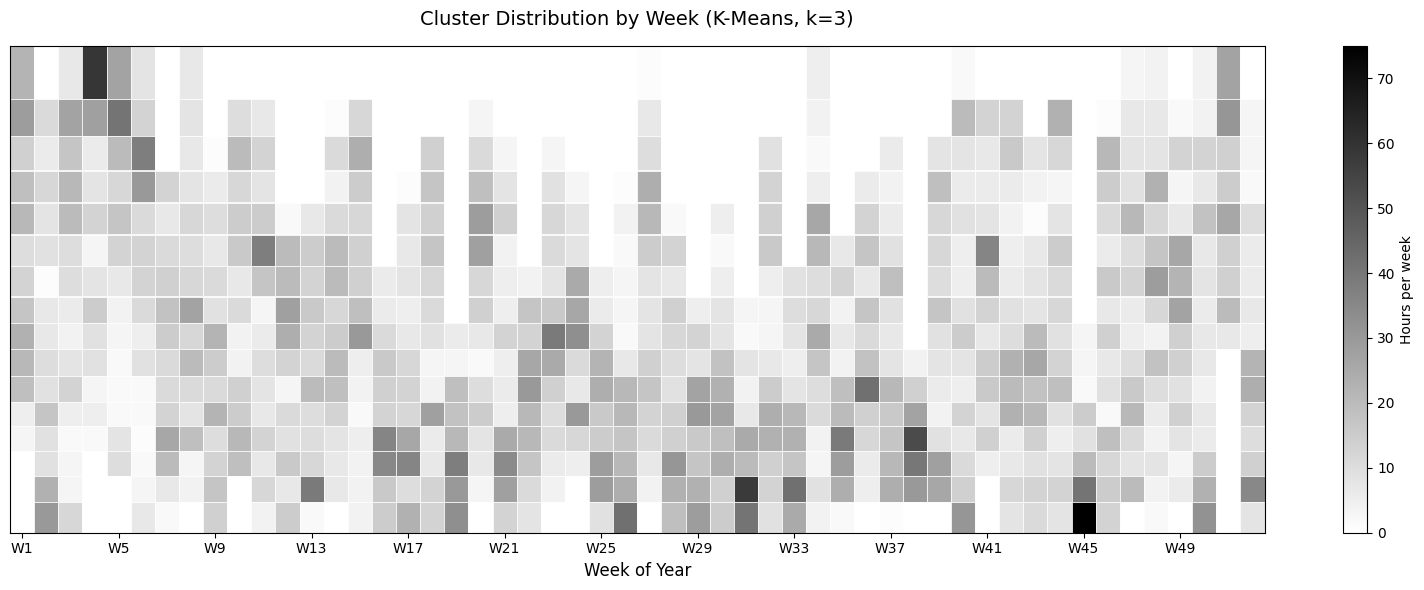

In [12]:
def plot_cluster_contribution_heatmap(times, cluster_labels, 
                                     values,
                                     cluster_ids=None,
                                     figsize=(16, 6),
                                     cmap='YlGnBu',
                                     title='Cluster Distribution by Week',
                                     ordered=False):
    """
    Create a GitHub-style contribution plot showing cluster distribution over weeks.
    
    Each cluster occupies vertical space proportional to its value range (min to max).
    Clusters are ordered by average value (smallest at top, largest at bottom).
    The y-axis spans from 0 to 1, with each cluster's height representing its value range.
    
    Parameters
    ----------
    times : array of datetime64
        Timestamps for each data point
    cluster_labels : array
        Cluster assignment for each time point
    values : array
        Original time series values (used to compute cluster averages for ordering)

    figsize : tuple
        Figure size (width, height)
    cmap : str
        Matplotlib colormap name
    title : str
        Plot title
    ordered : bool
        If True, reorder weeks based on dominant cluster (greedy: pick week with most hours
        in sorted_cluster_ids[0], then of remaining weeks pick the one with most hours in
        sorted_cluster_ids[1], etc.)
        
    Returns
    -------
    fig, ax : matplotlib figure and axes
    counts_matrix : np.ndarray
        The matrix of counts (n_clusters × n_weeks)
    """
    times_dt = pd.to_datetime(times)
    values_arr = np.asarray(values)
    
    # Get unique clusters
    cluster_ids = np.unique(cluster_labels)
    n_clusters = len(cluster_ids)
    
    # Calculate average, min, max for each cluster
    cluster_avg_values = {}
    cluster_min_values = {}
    cluster_max_values = {}
    
    for i, cluster_id in enumerate(cluster_ids):
        cluster_mask = cluster_labels == cluster_id
        cluster_data = values_arr[cluster_mask]
        cluster_avg_values[cluster_id] = np.mean(cluster_data)
        cluster_min_values[cluster_id] = np.min(cluster_data)
        cluster_max_values[cluster_id] = np.max(cluster_data)
    
    # Sort clusters by average value (descending: largest first, so smallest appears at top)
    sorted_cluster_ids = sorted(cluster_ids, key=lambda cid: cluster_avg_values[cid], reverse=True)
    
    # Create week labels (ISO week number)
    weeks = times_dt.isocalendar().week.values
    unique_weeks = np.unique(weeks)
    n_weeks = len(unique_weeks)
    
    # Create mapping from week number to column index
    week_to_col = {week: i for i, week in enumerate(unique_weeks)}
    
    # Map clusters to rows based on sorted order (for counts_matrix)
    cluster_to_row = {cluster: i for i, cluster in enumerate(sorted_cluster_ids)}
    
    # Initialize count matrix (clusters × weeks)
    counts_matrix = np.zeros((n_clusters, n_weeks), dtype=int)
    
    # Count occurrences for each (cluster, week) pair
    for i in range(len(times)):
        cluster = cluster_labels[i]
        week = weeks[i]
        row = cluster_to_row[cluster]
        col = week_to_col[week]
        counts_matrix[row, col] += 1
    
    # Reorder weeks if requested
    if ordered:
        # Greedy reordering: cycle through clusters, picking the best remaining week
        # based on highest count in the current cluster OR any previously processed cluster
        used_weeks = set()
        new_week_order = []
        
        # Continue until all weeks are assigned
        while len(used_weeks) < n_weeks:
            for cluster_idx in range(n_clusters):
                if len(used_weeks) >= n_weeks:
                    break
                
                # For this cluster, find the remaining week with the highest count
                # across the current cluster and all previously processed clusters
                best_week_idx = None
                best_count = -1
                
                for week_idx in range(n_weeks):
                    if week_idx not in used_weeks:
                        # Sum count across current and all previous clusters (0 to cluster_idx)
                        total_count = np.sum(counts_matrix[0:cluster_idx+1, week_idx])
                        if total_count > best_count:
                            best_count = total_count
                            best_week_idx = week_idx
                
                if best_week_idx is not None:
                    used_weeks.add(best_week_idx)
                    new_week_order.append(best_week_idx)
        
        # Reorder unique_weeks and counts_matrix columns
        unique_weeks = unique_weeks[new_week_order]
        counts_matrix = counts_matrix[:, new_week_order]
    
    # Create the figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get colormap
    cmap_obj = plt.get_cmap(cmap)
    max_count = np.max(counts_matrix)
    
    # Plot rectangles for each cluster and week with variable heights
    y_tick_positions = []
    y_tick_labels = []

    for row_idx, cluster_id in enumerate(sorted_cluster_ids):
        cluster_min = cluster_min_values[cluster_id]
        cluster_max = cluster_max_values[cluster_id]
        
        # Map to y-axis (0 to 1 range)
        y_bottom = cluster_min
        y_top = cluster_max
        if row_idx == 0:
            y_top = 1
        if row_idx == n_clusters-1:
            y_bottom = 0
        y_height = y_top - y_bottom
        
        for col_idx in range(n_weeks):
            count = counts_matrix[row_idx, col_idx]
            
            # Color intensity based on count
            if max_count > 0:
                color_intensity = count / max_count
            else:
                color_intensity = 0
            
            color = cmap_obj(color_intensity)
            
            # Draw rectangle
            rect = plt.Rectangle((col_idx - 0.5, y_bottom), 1.0, y_height,
                                facecolor=color, edgecolor='white', linewidth=0.5)
            ax.add_patch(rect)
    
            # Get cluster label and position
            y_tick_positions.append((y_bottom + y_top)/2)
            y_tick_labels.append(f'C{cluster_id} ({cluster_avg_values[cluster_id]:.3f})')
    
    # X-axis: Show week numbers at reasonable intervals
    ax.set_xlim(-0.5, n_weeks - 0.5)
    
    if n_weeks <= 20:
        tick_positions = np.arange(n_weeks)
        tick_labels = [f'W{w}' for w in unique_weeks]
    else:
        # Show every 4th week for readability
        tick_positions = np.arange(0, n_weeks, 4)
        tick_labels = [f'W{unique_weeks[i]}' for i in tick_positions]
    
    if not ordered:
        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels, rotation=0, ha='center')
    else:
        ax.set_xticks([])
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap_obj, norm=plt.Normalize(vmin=0, vmax=max_count))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Hours per week')
    
    # Styling
    ax.set_xlabel('Week of Year', fontsize=12)
    ax.set_title(title, fontsize=14, pad=15)
    ax.set_ylim([0, 1])
    ax.set_yticks([])

    plt.tight_layout()
    
    return fig, ax, counts_matrix


# Create the contribution heatmap for our clustering result
fig, ax, counts = plot_cluster_contribution_heatmap(
    x, cluster_labels, y, 
    cluster_ids=cluster_ids,
    figsize=(16, 6),
    cmap='binary',
    title='Cluster Distribution by Week (K-Means, k=3)'
)

plt.show()

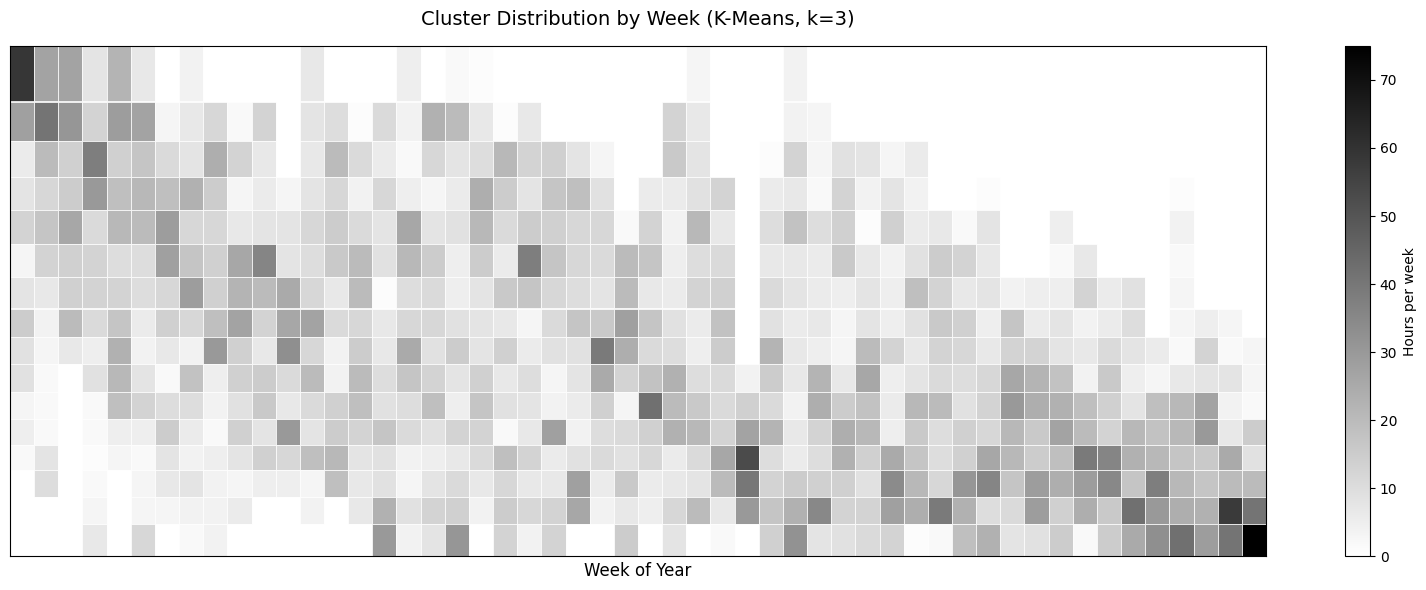

In [13]:
fig, ax, counts = plot_cluster_contribution_heatmap(
    x, cluster_labels, y, 
    cluster_ids=cluster_ids,
    figsize=(16, 6),
    cmap='binary',
    title='Cluster Distribution by Week (K-Means, k=3)',
    ordered=True
)

plt.show()

In [ ]:
from pyoscomp.input.discretize import HierarchicalClustering

# Prepare data
x = year_data['time'].values
y = year_data['NATIONAL'].values

# Test 1: Explicit structure (seasons×daytypes×timebrackets)
print("=" * 80)
print("TEST 1: Explicit hierarchy structure")
print("=" * 80)
hc_explicit = HierarchicalClustering(n_clusters=24, window_size=24, hierarchy_levels=(4,2,3))
result_explicit = hc_explicit.discretize(y, x)

print(f"Discretizer: {hc_explicit}")
print(f"Number of segments: {result_explicit.n_segments}")
print(f"Level sizes: {result_explicit.level_sizes}")
print(f"Number of levels: {result_explicit.n_levels}")

# Test 2: Natural breakpoints with 3 levels
print("\n" + "=" * 80)
print("TEST 2: Natural breakpoints with 3 requested levels")
print("=" * 80)
hc_natural = HierarchicalClustering(n_clusters=24, window_size=24, n_hierarchy_levels=3)
result_natural = hc_natural.discretize(y, x)

print(f"Discretizer: {hc_natural}")
print(f"Number of segments: {result_natural.n_segments}")
print(f"Level sizes: {result_natural.level_sizes}")
print(f"Number of levels: {result_natural.n_levels}")

# Test 3: Auto-detect (uses log2 heuristic)
print("\n" + "=" * 80)
print("TEST 3: Auto-detected natural hierarchy")
print("=" * 80)
hc_auto = HierarchicalClustering(n_clusters=24, window_size=24)
result_auto = hc_auto.discretize(y, x)

print(f"Discretizer: {hc_auto}")
print(f"Number of segments: {result_auto.n_segments}")
print(f"Level sizes: {result_auto.level_sizes}")
print(f"Number of levels: {result_auto.n_levels}")

TEST 1: Explicit hierarchy structure
Discretizer: HierarchicalClustering(4×2×3=24)
Number of segments: 1242
Has hierarchy: True
Level sizes: (4, 2, 3)
Number of levels: 3

TEST 2: Natural breakpoints with 3 requested levels
Discretizer: HierarchicalClustering(k=24)
Number of segments: 1242
Has hierarchy: True
Level sizes: (np.int64(2), np.int64(1), np.int64(8))
Number of levels: 3

TEST 3: Auto-detected natural hierarchy
Discretizer: HierarchicalClustering(k=24)
Number of segments: 1242
Has hierarchy: True
Level sizes: (np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(3))
Number of levels: 5


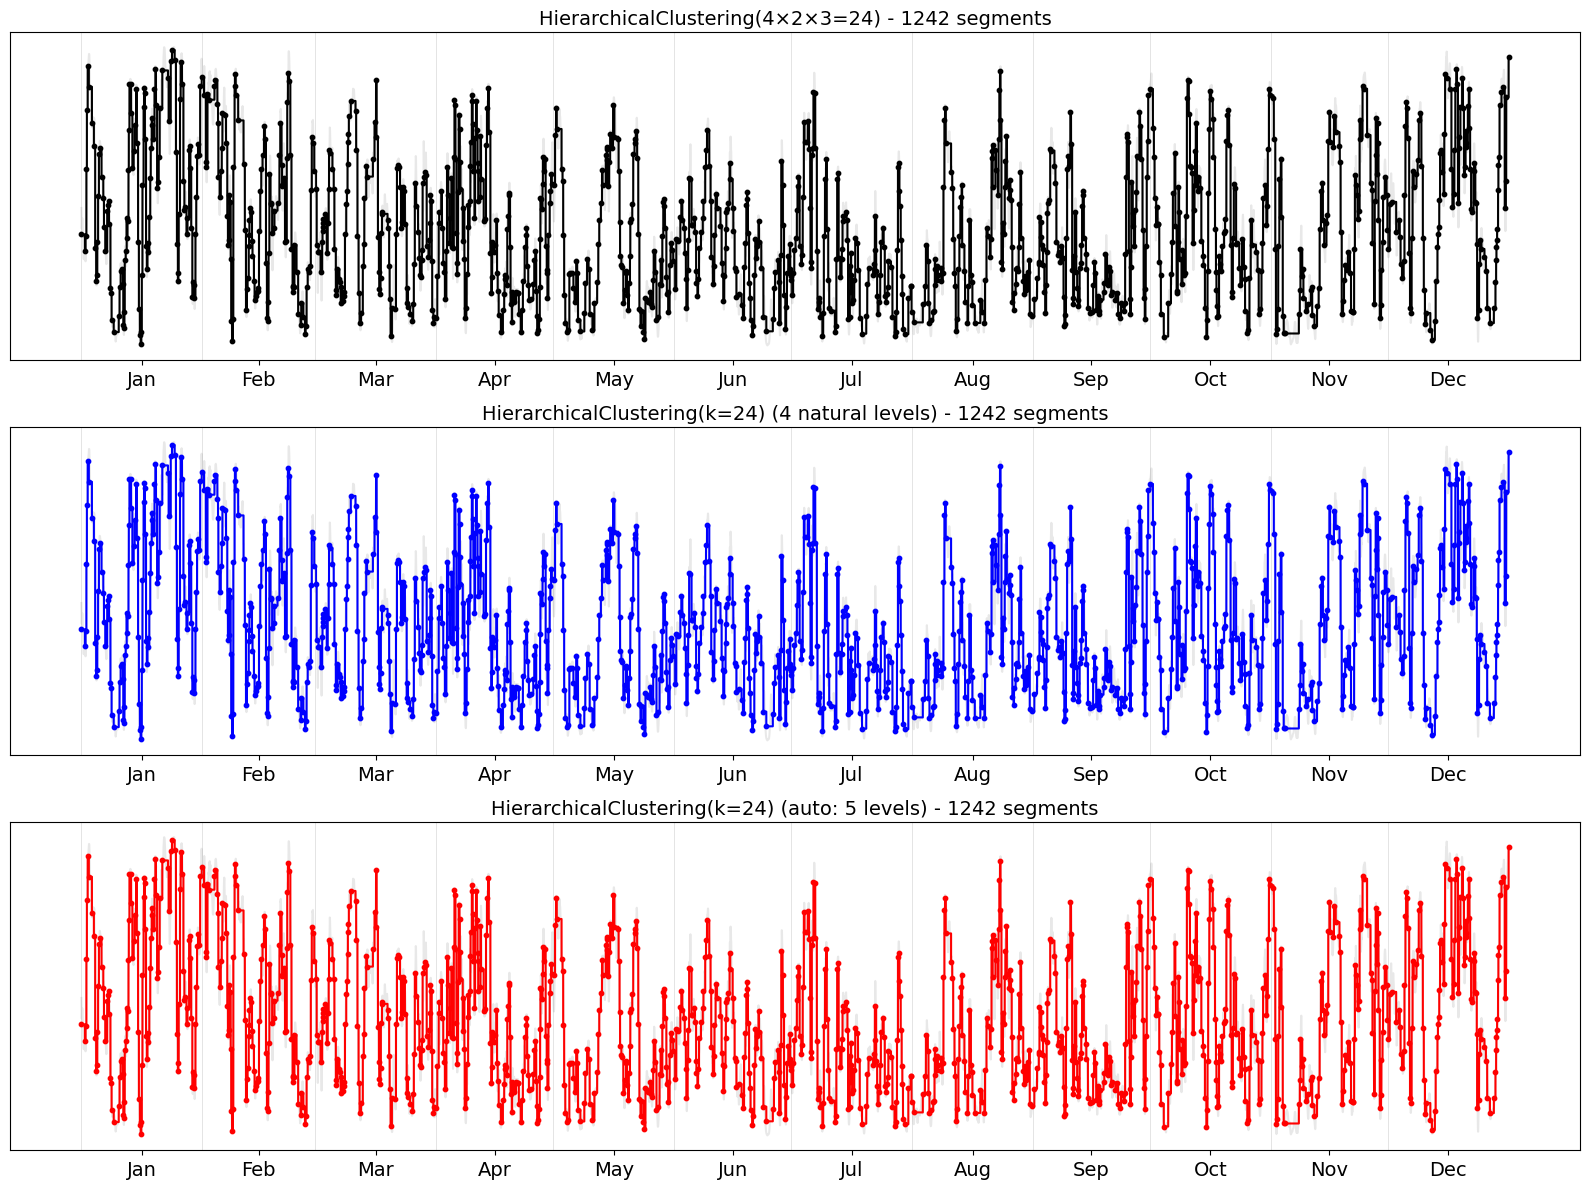

In [15]:
# Create visualizations for the three approaches
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Explicit hierarchy
indices_explicit = result_explicit.indices
x_discrete_explicit = x[indices_explicit]
y_avg_explicit = calculate_segment_value(indices_explicit, y, method=np.mean)

axes[0].plot(x, y, 'lightgray', alpha=0.5, label='Original')
axes[0].step(x_discrete_explicit, y_avg_explicit, where='post', color='black', linewidth=1.5)
axes[0].scatter(x_discrete_explicit, y_avg_explicit, color='black', s=10, zorder=5)
format_timeseries_axis(axes[0], year_data['time'], latest_year, 
                      title=f'{hc_explicit} - {result_explicit.n_segments} segments')

# Plot 2: Natural breakpoints with 4 levels
indices_natural = result_natural.indices
x_discrete_natural = x[indices_natural]
y_avg_natural = calculate_segment_value(indices_natural, y, method=np.mean)

axes[1].plot(x, y, 'lightgray', alpha=0.5, label='Original')
axes[1].step(x_discrete_natural, y_avg_natural, where='post', color='blue', linewidth=1.5)
axes[1].scatter(x_discrete_natural, y_avg_natural, color='blue', s=10, zorder=5)
format_timeseries_axis(axes[1], year_data['time'], latest_year, 
                      title=f'{hc_natural} (4 natural levels) - {result_natural.n_segments} segments')

# Plot 3: Auto-detected
indices_auto = result_auto.indices
x_discrete_auto = x[indices_auto]
y_avg_auto = calculate_segment_value(indices_auto, y, method=np.mean)

axes[2].plot(x, y, 'lightgray', alpha=0.5, label='Original')
axes[2].step(x_discrete_auto, y_avg_auto, where='post', color='red', linewidth=1.5)
axes[2].scatter(x_discrete_auto, y_avg_auto, color='red', s=10, zorder=5)
format_timeseries_axis(axes[2], year_data['time'], latest_year, 
                      title=f'{hc_auto} (auto: {result_auto.n_levels} levels) - {result_auto.n_segments} segments')

plt.tight_layout()
plt.show()

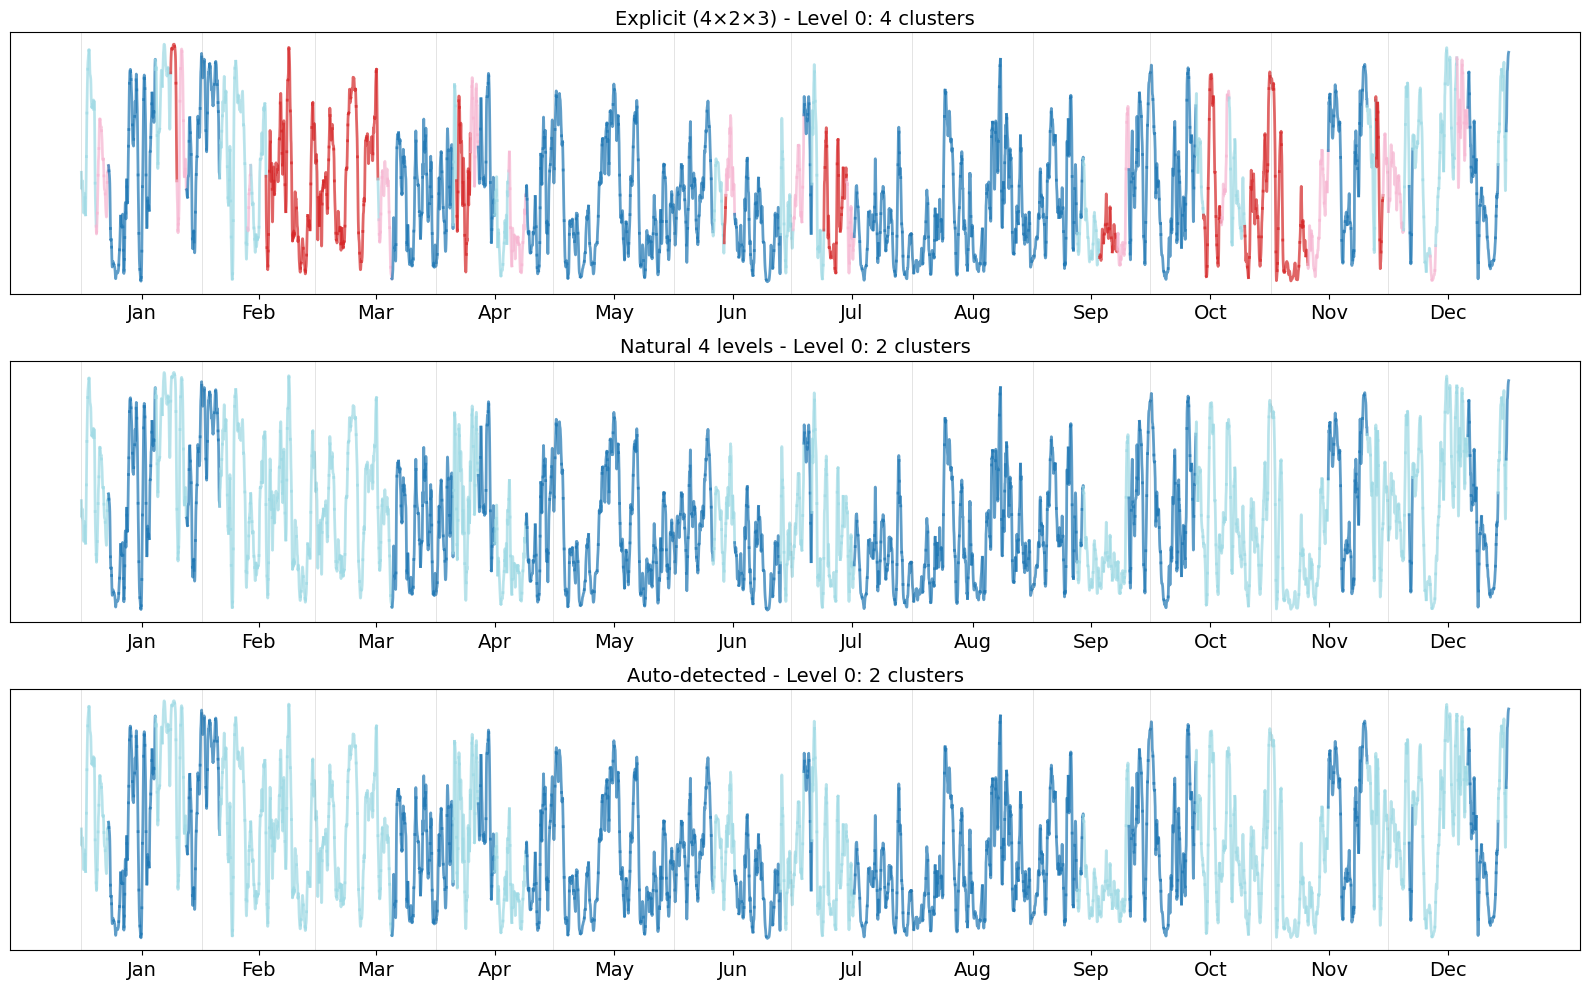

In [16]:
# Visualize the hierarchy structure as a colored timeseries
# Show how segments map to top-level clusters

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

def plot_hierarchical_coloring(ax, x, y, indices, hierarchical_labels, level, title):
    """Plot timeseries colored by cluster assignment at a specific hierarchy level"""
    
    # Get cluster assignments for this level
    clusters = hierarchical_labels[:, level]
    unique_clusters = np.unique(clusters)
    
    # Create a colormap
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_clusters)))
    cluster_to_color = {c: colors[i] for i, c in enumerate(unique_clusters)}
    
    # Plot each segment with its cluster color
    for i in range(len(indices) - 1):
        start_idx = indices[i]
        end_idx = indices[i + 1]
        cluster = clusters[i]
        color = cluster_to_color[cluster]
        
        ax.plot(x[start_idx:end_idx+1], y[start_idx:end_idx+1], 
               color=color, linewidth=2, alpha=0.7)
    
    # Plot original data in light gray behind
    ax.plot(x, y, color='lightgray', linewidth=0.5, alpha=0.3, zorder=-1)
    
    format_timeseries_axis(ax, pd.Series(x), latest_year, title=title)
    
    return cluster_to_color

# Plot level 0 (coarsest) for each approach
plot_hierarchical_coloring(axes[0], x, y, result_explicit.indices, 
                           result_explicit.hierarchical_labels, 0,
                           f'Explicit (4×2×3) - Level 0: {result_explicit.level_sizes[0]} clusters')

plot_hierarchical_coloring(axes[1], x, y, result_natural.indices, 
                           result_natural.hierarchical_labels, 0,
                           f'Natural 4 levels - Level 0: {result_natural.level_sizes[0]} clusters')

plot_hierarchical_coloring(axes[2], x, y, result_auto.indices, 
                           result_auto.hierarchical_labels, 0,
                           f'Auto-detected - Level 0: {result_auto.level_sizes[0]} clusters')

plt.tight_layout()
plt.show()

In [ ]:
# Visualize hierarchy distribution across levels
def print_hierarchy_summary(result, name):
    """Print a summary of how segments are distributed across hierarchy levels"""
    print(f"\n{'=' * 60}")
    print(f"Hierarchy Distribution: {name}")
    print('=' * 60)
    
    if not result.has_hierarchy:
        print("No hierarchical structure available")
        return
    
    n_levels = result.n_levels
    for level in range(n_levels):
        level_labels = result.hierarchical_labels[:, level]
        unique_clusters = np.unique(level_labels)
        counts = [np.sum(level_labels == c) for c in unique_clusters]
        
        print(f"\nLevel {level} ({len(unique_clusters)} clusters):")
        for cluster_id, count in zip(unique_clusters, counts):
            pct = 100 * count / len(level_labels)
            bar = '█' * int(pct / 2)
            print(f"  Cluster {cluster_id:2d}: {count:3d} segments ({pct:5.1f}%) {bar}")

# Print summaries for all three approaches
print_hierarchy_summary(result_explicit, "Explicit (4×2×3)")
print_hierarchy_summary(result_natural, "Natural 3 levels")
print_hierarchy_summary(result_auto, "Auto-detected")


Hierarchy Distribution: Explicit (4×2×3)

Level 0 (4 clusters):
  Cluster  1: 2393 segments ( 27.3%) █████████████
  Cluster  2: 3974 segments ( 45.4%) ██████████████████████
  Cluster  3: 1006 segments ( 11.5%) █████
  Cluster  4: 1387 segments ( 15.8%) ███████

Level 1 (8 clusters):
  Cluster  1: 1229 segments ( 14.0%) ███████
  Cluster  2: 377 segments (  4.3%) ██
  Cluster  3: 787 segments (  9.0%) ████
  Cluster  4: 1992 segments ( 22.7%) ███████████
  Cluster  5: 666 segments (  7.6%) ███
  Cluster  6: 1316 segments ( 15.0%) ███████
  Cluster  7: 1006 segments ( 11.5%) █████
  Cluster  8: 1387 segments ( 15.8%) ███████

Level 2 (24 clusters):
  Cluster  1: 547 segments (  6.2%) ███
  Cluster  2: 206 segments (  2.4%) █
  Cluster  3: 476 segments (  5.4%) ██
  Cluster  4: 101 segments (  1.2%) 
  Cluster  5: 276 segments (  3.2%) █
  Cluster  6: 314 segments (  3.6%) █
  Cluster  7: 168 segments (  1.9%) 
  Cluster  8: 305 segments (  3.5%) █
  Cluster  9: 710 segments (  8.1%) █

In [18]:
# from pyoscomp.input.discretize import auto_pelt, auto_rdp

# # Prepare your data
# x = year_data['time'].values
# y = year_data['NATIONAL'].values

# # Example 1: Auto-tune PELT to get exactly 16 points
# print("=" * 60)
# print("Auto-tuning PELT to achieve 16 discrete points")
# print("=" * 60)

# indices_auto, info = auto_pelt(y, x, n_points=16, model='rbf', min_size=5)

# print(f"Target points: 50")
# print(f"Achieved points: {info['n_points_achieved']}")
# print(f"Optimal penalty: {info['param_value']:.4f}")
# print(f"Converged: {info['converged']}")
# print(f"Iterations: {info['iterations']}")

# # Example 2: Auto-tune RDP to get exactly 16 points
# print("\n" + "=" * 60)
# print("Auto-tuning RDP to achieve 16 discrete points")
# print("=" * 60)

# indices_rdp, info_rdp = auto_rdp(y, x, n_points=16)

# print(f"Target points: 100")
# print(f"Achieved points: {info_rdp['n_points_achieved']}")
# print(f"Optimal epsilon: {info_rdp['param_value']:.4f}")
# print(f"Converged: {info_rdp['converged']}")
# print(f"Iterations: {info_rdp['iterations']}")

# # Visualize the auto-tuned results
# fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# # Plot 1: Auto-tuned PELT (16 points)
# x_discrete_auto = x[indices_auto]
# y_avg_auto = calculate_segment_value(indices_auto, y, method=np.mean)

# axes[0].plot(x, y, 'lightgray', alpha=0.5)
# axes[0].step(x_discrete_auto, y_avg_auto, where='post', color='black', linewidth=1.5)
# axes[0].scatter(x_discrete_auto, y_avg_auto, color='black', s=10, zorder=5)
# format_timeseries_axis(axes[0], year_data['time'], latest_year, 
#                        title=f'Auto-tuned PELT (n={len(indices_auto)} points, penalty={info["param_value"]:.3f})')

# # Plot 2: Auto-tuned RDP (16 points)
# x_discrete_rdp = x[indices_rdp]
# y_avg_rdp_auto = calculate_segment_value(indices_rdp, y, method=np.mean)

# axes[1].plot(x, y, 'lightgray', alpha=0.5)
# axes[1].step(x_discrete_rdp, y_avg_rdp_auto, where='post', color='red', linewidth=1.5)
# axes[1].scatter(x_discrete_rdp, y_avg_rdp_auto, color='red', s=10, zorder=5)
# format_timeseries_axis(axes[1], year_data['time'], latest_year, 
#                        title=f'Auto-tuned RDP (n={len(indices_rdp)} points, ε={info_rdp["param_value"]:.3f})')

# plt.tight_layout()
# plt.show()

Greedy selection for exactly 16 discrete points
Target points: 16
Achieved points: 16


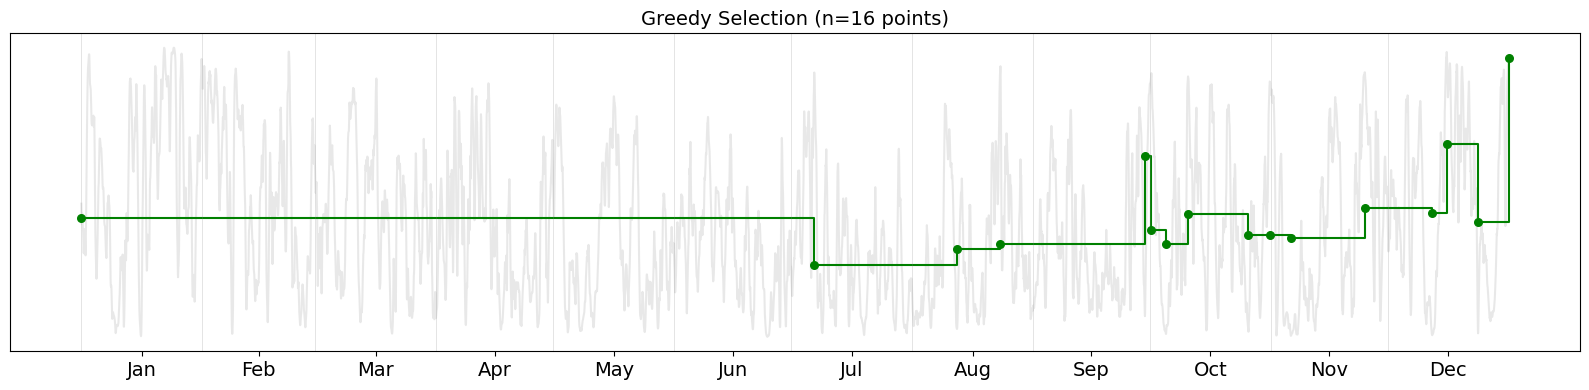

In [20]:
from pyoscomp.input.discretize import greedy_select_points

# Prepare your data
x = year_data['time'].values
y = year_data['NATIONAL'].values

# Example: Greedy selection to get exactly 16 points
print("=" * 60)
print("Greedy selection for exactly 16 discrete points")
print("=" * 60)

indices_greedy = greedy_select_points(y, x, n_points=16)
x_discrete_greedy = x[indices_greedy]
y_avg_greedy = calculate_segment_value(indices_greedy, y, method=np.mean)

print(f"Target points: 16")
print(f"Achieved points: {len(indices_greedy)}")

# Visualize the result
fig, ax = plt.subplots(figsize=(16, 4))

ax.plot(x, y, 'lightgray', alpha=0.5, label='Original')
ax.step(x_discrete_greedy, y_avg_greedy, where='post', color='green', linewidth=1.5)
ax.scatter(x_discrete_greedy, y_avg_greedy, color='green', s=30, zorder=5, label='Selected Points')
format_timeseries_axis(ax, year_data['time'], latest_year, 
                       title=f'Greedy Selection (n={len(indices_greedy)} points)')

plt.tight_layout()
plt.show()